<a href="https://colab.research.google.com/github/killianstorm/simulated-anthropomorphic-finger/blob/master/learning_grasp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! git clone https://github.com/killianstorm/simulated-anthropomorphic-finger

In [1]:
import sys
import os

sys.path.append('/content/simulated-anthropomorphic-finger/finger_model')
from analysis.learning.gradient_descent import *

/usr/local/lib/python3.6/dist-packages/jax/lib/xla_bridge.py:127: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [0]:
# Interval.
tmax, dt = 1., 0.001
interval = num.arange(0, tmax + dt, dt)

fp = []
for i in interval:
    fp.append(10.)

p_predefined = {
    'interval': interval,
    'F_fs': np.zeros(interval.shape[0]),
    'F_io': np.zeros(interval.shape[0]),
    'F_fp': np.array(fp),
    'F_ed': np.zeros(interval.shape[0]),
}

name = "full grasp trajectory \n with angle loss function"
reference = simulate_predefined(p_predefined)

Performing gradient descent on model with tendons
Experiment name: full grasp trajectory 
 with angle loss function
Reference duration: 1.0
dt: 0.001
Start time is _12-Jun-2020_(21:45:12.065980)


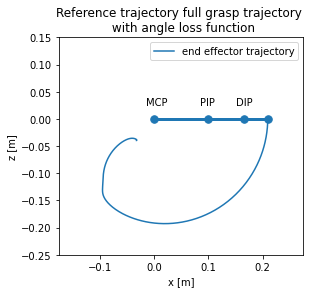

In [0]:
loss_function = loss_angles

# Learn to reproduce trajectory using gradient descent.
learn_gradient_descent(reference, interval, 2, loss_function=loss_function, tendons=True, name=name)

In [0]:
loss_function = loss_endeffector

# Learn to reproduce trajectory using gradient descent.
learn_gradient_descent(reference, interval, 250, loss_function=loss_function, tendons=True, name=name)